In [25]:
import numpy as np
import pandas as pd

In [66]:
!pip install pingouin

In [26]:
import pingouin as pin

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# One-Way ANOVA (Completely Randomized design)

<div>
    <img src='./images/one-way-anova.png' width=800>
</div>

In [28]:
alpha = 0.01

In [29]:
milk_company = pd.DataFrame({'fill_measures':[4.05,4.01,4.02,4.04,
                                              3.99,4.02,4.01,3.99,
                                              4.00,4.00,3.97,3.98,
                                              3.97,3.95,4.00,4.00,
                                              4.02,3.99,4.01],
                             'machine':[1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4]})
milk_company

,fill_measures,machine
0,4.05,1
1,4.01,1
2,4.02,1
3,4.04,1
4,3.99,2
5,4.02,2
6,4.01,2
7,3.99,2
8,4.00,2
9,4.00,2


In [30]:
test = pin.anova(milk_company,'fill_measures','machine',detailed=True)
test

,Source,SS,DF,MS,F,p-unc,np2
0,machine,0.007076,3,0.002359,10.098403,0.000685,0.668839
1,Within,0.003503,15,0.000234,NaN,NaN,NaN


In [31]:
test['p-unc'][0]<alpha

True

**Since the p value is less that alpha, we reject the null hypothesis, indicating at least<br>
one of the machines average fill is different.**

In [32]:
iris = sns.load_dataset('iris').dropna()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


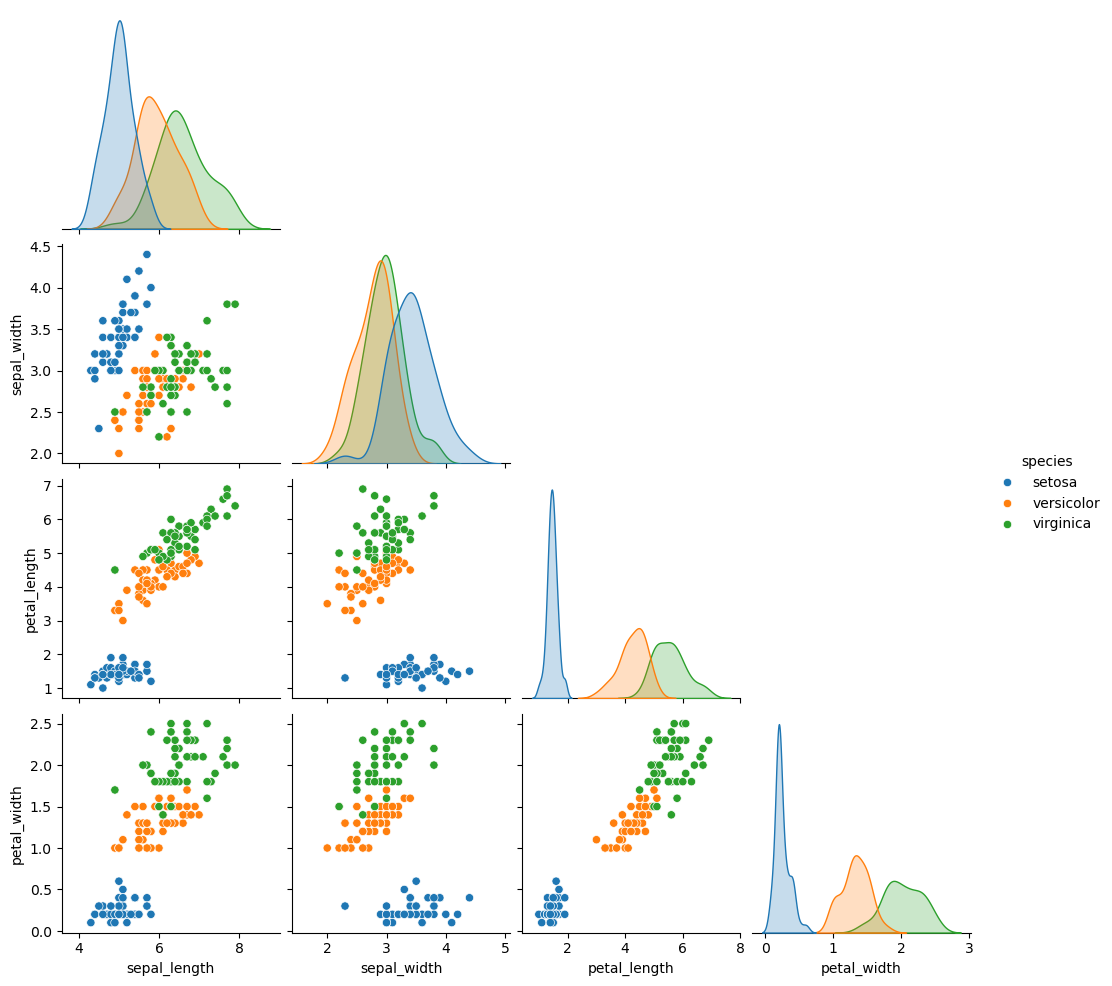

In [37]:
sns.pairplot(iris,hue='species',corner=True)
plt.show()

In [38]:
petal_length = iris[['petal_length','species']]
petal_length.head()

,petal_length,species
0,1.4,setosa
1,1.4,setosa
2,1.3,setosa
3,1.5,setosa
4,1.4,setosa


In [39]:
petal_length_test = pin.anova(petal_length,'petal_length','species',detailed=True)
petal_length_test

,Source,SS,DF,MS,F,p-unc,np2
0,species,437.1028,2,218.551400,1180.161182,2.856777e-91,0.941372
1,Within,27.2226,147,0.185188,NaN,NaN,NaN


**The test indicates that the at least on of the species mean petal length is significantly different from the others**

## Post-hoc tests / Multiple Comparisons

## Tukey's HSD

In [72]:
pin.pairwise_tukey(petal_length,'petal_length','species')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,setosa,versicolor,1.462,4.260,-2.798,0.086067,-32.509597,2.153833e-14,-7.837941
1,setosa,virginica,1.462,5.552,-4.090,0.086067,-47.521176,2.153833e-14,-9.920532
2,versicolor,virginica,4.260,5.552,-1.292,0.086067,-15.011579,2.153833e-14,-2.501415


In [73]:
from scipy import stats

In [74]:
setosa = petal_length.query("species == 'setosa'")['petal_length'].values
versicolor = petal_length.query("species == 'versicolor'")['petal_length'].values
virginica = petal_length.query("species == 'virginica'")['petal_length'].values

In [75]:
HSD = stats.tukey_hsd(setosa,versicolor,virginica)

In [76]:
print(HSD)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.798     0.000    -3.002    -2.594
 (0 - 2)     -4.090     0.000    -4.294    -3.886
 (1 - 0)      2.798     0.000     2.594     3.002
 (1 - 2)     -1.292     0.000    -1.496    -1.088
 (2 - 0)      4.090     0.000     3.886     4.294
 (2 - 1)      1.292     0.000     1.088     1.496



### Fisher's LSD

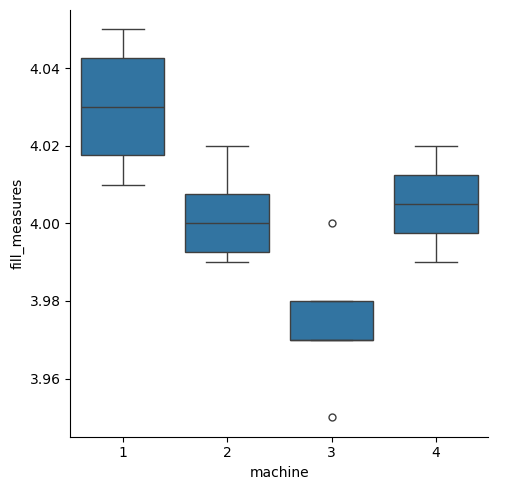

In [8]:
sns.catplot(data=milk_company,x='machine',y='fill_measures',kind='box')
plt.show()

In [9]:
m1 = milk_company.query('machine == 1')['fill_measures'].mean()

In [10]:
m2 = milk_company.query('machine == 2')['fill_measures'].mean()

In [11]:
m3 = milk_company.query('machine == 3')['fill_measures'].mean()

In [12]:
m4 = milk_company.query('machine == 4')['fill_measures'].mean()

In [13]:
mean_1 = np.array([m1,m1,m1,m2,m2,m3])
mean_2 = np.array([m2,m3,m4,m3,m4,m4])
n1 = [4,4,4,6,6,5]
n2 = [6,5,4,5,4,4]
difference = mean_1-mean_2

In [14]:
pairwise_comparisons = pd.DataFrame({'mean_1':mean_1,'mean_2':mean_2,'n1':n1,'n2':n2,'difference':difference},
                                   index=['1v2','1v3','1v4','2v3','2v4','3v4'])
pairwise_comparisons

,mean_1,mean_2,n1,n2,difference
1v2,4.030000,4.001667,4,6,0.028333
1v3,4.030000,3.974000,4,5,0.056000
1v4,4.030000,4.005000,4,4,0.025000
2v3,4.001667,3.974000,6,5,0.027667
2v4,4.001667,4.005000,6,4,-0.003333
3v4,3.974000,4.005000,5,4,-0.031000


In [15]:
MSE = test['MS'][1]
df = test['DF'][1]

In [16]:
def test_statistic(row):
    return row.difference/np.sqrt(MSE*((1/row.n1)+(1/row.n2)))

In [17]:
pairwise_comparisons.insert(5,'t',pairwise_comparisons.apply(test_statistic,axis=1))

In [18]:
pairwise_comparisons

,mean_1,mean_2,n1,n2,difference,t
1v2,4.030000,4.001667,4,6,0.028333,2.872157
1v3,4.030000,3.974000,4,5,0.056000,5.462440
1v4,4.030000,4.005000,4,4,0.025000,2.313449
2v3,4.001667,3.974000,6,5,0.027667,2.989689
2v4,4.001667,4.005000,6,4,-0.003333,-0.337901
3v4,3.974000,4.005000,5,4,-0.031000,-3.023851


In [19]:
import scipy

In [20]:
def p_value(row):
    if row['t'] > 0:
        return round(scipy.stats.t.cdf(-row['t'],df)+(1-scipy.stats.t.cdf(row['t'],df)),4) 
    else:
        return round(scipy.stats.t.cdf(row['t'],df)+(1-scipy.stats.t.cdf(-row['t'],df)),4)

In [21]:
pairwise_comparisons.insert(6,'p',pairwise_comparisons.apply(p_value,axis=1))
pairwise_comparisons

,mean_1,mean_2,n1,n2,difference,t,p
1v2,4.030000,4.001667,4,6,0.028333,2.872157,0.0116
1v3,4.030000,3.974000,4,5,0.056000,5.462440,0.0001
1v4,4.030000,4.005000,4,4,0.025000,2.313449,0.0353
2v3,4.001667,3.974000,6,5,0.027667,2.989689,0.0092
2v4,4.001667,4.005000,6,4,-0.003333,-0.337901,0.7401
3v4,3.974000,4.005000,5,4,-0.031000,-3.023851,0.0085


In [22]:
def decision(row):
    if row['p'] < (alpha):
        return 'reject'
    else :
        return 'accept'

In [23]:
pairwise_comparisons.insert(7,'decision',pairwise_comparisons.apply(decision,axis=1))
pairwise_comparisons

,mean_1,mean_2,n1,n2,difference,t,p,decision
1v2,4.030000,4.001667,4,6,0.028333,2.872157,0.0116,accept
1v3,4.030000,3.974000,4,5,0.056000,5.462440,0.0001,reject
1v4,4.030000,4.005000,4,4,0.025000,2.313449,0.0353,accept
2v3,4.001667,3.974000,6,5,0.027667,2.989689,0.0092,reject
2v4,4.001667,4.005000,6,4,-0.003333,-0.337901,0.7401,accept
3v4,3.974000,4.005000,5,4,-0.031000,-3.023851,0.0085,reject


In [24]:
pairwise_comparisons.query('decision == "reject"').index

Index(['1v3', '2v3', '3v4'], dtype='object')

**Our Culprit is machine 3, which can be clearly seen in the graph above also. Further we can see that<br>
the p value for 1v3 is the lowest, indicating the means of these two machines are the furthest apart, which<br>
can also be seen in the graph above.**

# Two-way ANOVA without replacement (Randomized block design)

In [145]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

<div>
    <img src='./images/two-way-anova.png' width=800>
</div>

In [195]:
data = pd.DataFrame({'rating':[11,15,19,16,9,5,9,14,12,8,8,8,15,10,7],
                     'affiliation':['D']*5+['R']*5+['I']*5,
                    's_class': ["U","UM","M","LM","L"]*3})
data

,rating,affiliation,s_class
0,11,D,U
1,15,D,UM
2,19,D,M
3,16,D,LM
4,9,D,L
5,5,R,U
6,9,R,UM
7,14,R,M
8,12,R,LM
9,8,R,L


In [196]:
data.pivot_table(values='rating',columns='affiliation',index='s_class')

affiliation,D,I,R
s_class,,,
L,9.0,7.0,8.0
LM,16.0,10.0,12.0
M,19.0,15.0,14.0
U,11.0,8.0,5.0
UM,15.0,8.0,9.0


<Axes: >

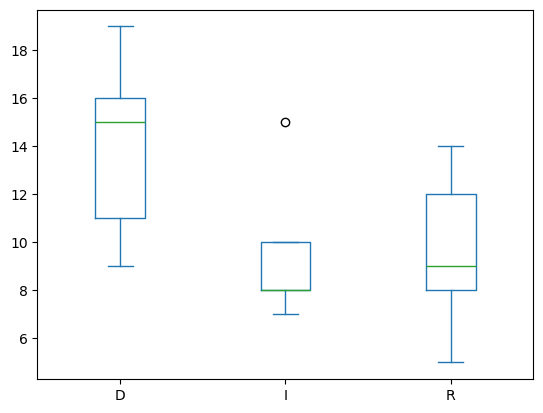

In [203]:
data.pivot_table(values='rating',columns='affiliation',index='s_class').plot(kind='box')

**Let's try doing One-Way ANOVA first**

In [210]:
formula = 'rating ~affiliation'
model = ols(formula,data).fit()
aov_table = anova_lm(model,typ=2)

In [211]:
print(aov_table)

                 sum_sq    df         F   PR(>F)
affiliation   64.533333   2.0  2.507772  0.12303
Residual     154.400000  12.0       NaN      NaN


**We can see that SSR (unexplained variance) is pretty high compared to the variance explained by affiliation.<br>
Maybe There is someother factor that I causing this variance in rating. Let's introduce the blocking variable of<br>
economic class. It seems logical that one's economic class influences their perception on the economy.**

In [212]:
formula = 'rating ~affiliation+s_class'
model = ols(formula,data).fit()
aov_table = anova_lm(model,typ=2)

In [213]:
print(aov_table)

                 sum_sq   df          F   PR(>F)
affiliation   64.533333  2.0  15.365079  0.00182
s_class      137.600000  4.0  16.380952  0.00064
Residual      16.800000  8.0        NaN      NaN


**We can see a drastic reduction in SSR from 154 to 16. This indicated we have chosen a good blocking variable
which is able to explain a majority part of the unexplained variance. We are only interested in the groups.
Correspoind to affiliation the p value is 0.001 which is less than 0.01 therefore we reject the null hypothesis<
that the mean rating of all affiliation groups are the same.<br>
Additionally we can see that the p value for s_class is even lower indicating the econimic class is greatly influcing the rating (at least one of the blocking means is different from the others)**

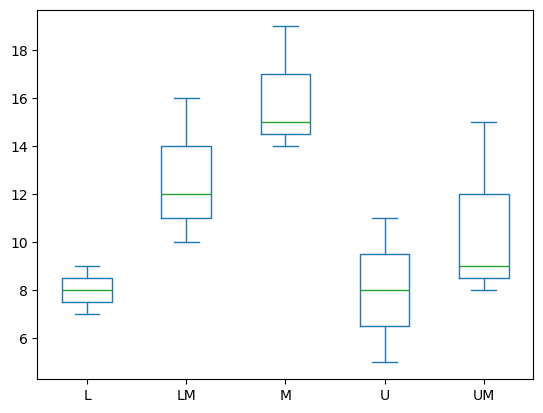

In [214]:
data.pivot_table(values='rating',index='affiliation',columns='s_class').plot(kind='box')
plt.show()

# Two Way Anova With Replication (A Factorial Design)

<div>
    <img src='./images/factorialDesign.png' width=700>
</div>

In [215]:
pairs_sold = [41,30,45,25,31,22,18,29,33,
              38,31,39,29,35,30,22,17,25,
              59,48,51,44,48,50,29,28,26,
              47,40,39,43,42,53,24,27,32]

number_of_competitors = ['0']*9+['1']*9+['2']*9+['3+']*9

location = (['SA']*3+['Mall']*3+['DT']*3)*4

In [223]:
data = pd.DataFrame({'pairs_sold':pairs_sold,
                     'competitors':number_of_competitors,
                     'location':location})
data.head()

,pairs_sold,competitors,location
0,41,0,SA
1,30,0,SA
2,45,0,SA
3,25,0,Mall
4,31,0,Mall


In [245]:
data.pivot_table(values='pairs_sold',columns='competitors',index='location')

competitors,0,1,2,3+
location,,,,
DT,26.666667,21.333333,27.666667,27.666667
Mall,26.000000,31.333333,47.333333,46.000000
SA,38.666667,36.000000,52.666667,42.000000


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

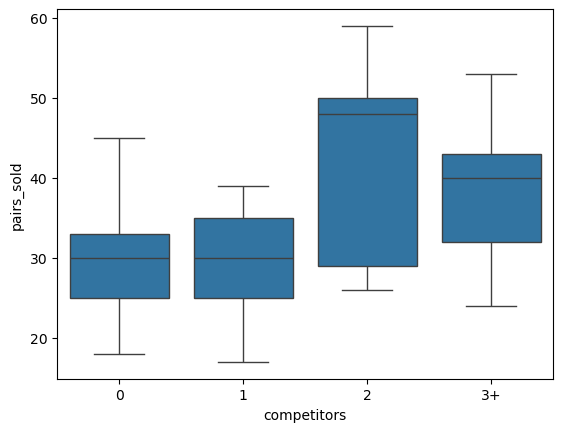

In [231]:
sns.boxplot(x='competitors',y='pairs_sold',data=data)
plt.show()

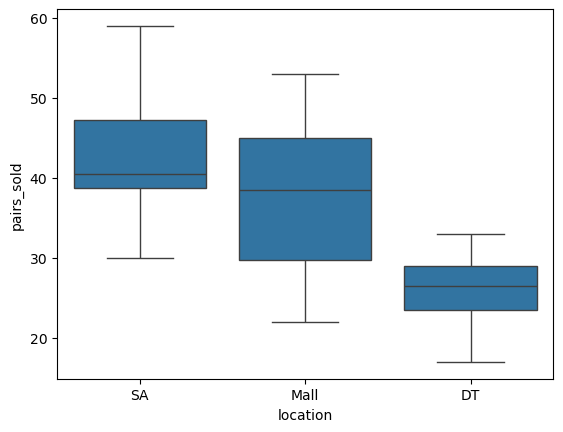

In [232]:
sns.boxplot(x='location',y='pairs_sold',data=data)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The provided callable <function mean at 0x105386c00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


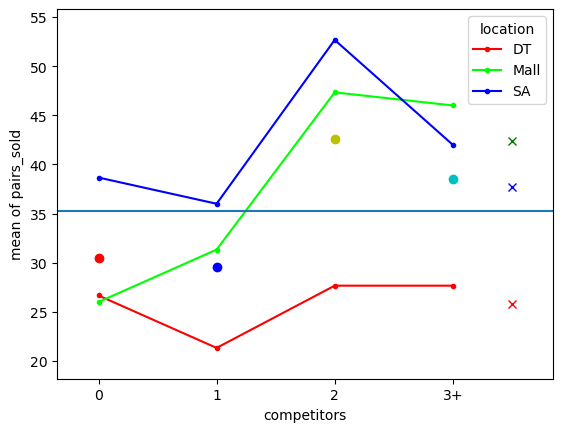

In [283]:
fig = interaction_plot(data.competitors,data.location,data.pairs_sold)
plt.axhline(data.pairs_sold.mean())
plt.plot(0,data.query('competitors == "0"')['pairs_sold'].mean(),'ro') #marginal mean col1
plt.plot(1,data.query('competitors == "1"')['pairs_sold'].mean(),'bo') #marginal mean col2
plt.plot(2,data.query('competitors == "2"')['pairs_sold'].mean(),'yo') #marginal mean col3
plt.plot(3,data.query('competitors == "3+"')['pairs_sold'].mean(),'co') #marginal mean col4
plt.plot(3.5,data.query('location == "DT"')['pairs_sold'].mean(),'rx') #marginal mean row1
plt.plot(3.5,data.query('location == "Mall"')['pairs_sold'].mean(),'bx') #marginal mean row2
plt.plot(3.5,data.query('location == "SA"')['pairs_sold'].mean(),'gx') #marginal mean row3

In [284]:
#H01 There is no significant difference in pairs sold according to the number of  competitors in a 1 mile radius
#H02 There is no significant difference in pairs sold according store location of the competitors in a 1 mile radius
#H03 There is no significant interaction affects ...

In [285]:
formula = 'pairs_sold~competitors+location+competitors*location'
model = ols(formula,data).fit()
aov_table = anova_lm(model,typ=2)

In [286]:
print(aov_table)

                           sum_sq    df          F        PR(>F)
competitors           1078.333333   3.0  14.204171  1.574850e-05
location              1736.222222   2.0  34.305159  9.175344e-08
competitors:location   503.333333   6.0   3.315038  1.605011e-02
Residual               607.333333  24.0        NaN           NaN


In [287]:
'''
First LOOK AT THE INTERACTION, we can see that the interaction is significant as p value for competitors:location is less than 0.05. 
We shouldn't look at the 2 independent factors individually as they are intertwined/infulence one another
'''

"\nFirst LOOK AT THE INTERACTION, we can see that the interaction is significant as p value for competitors:location is less than 0.05. \nWe shouldn't look at the 2 independent factors individually as they are intertwined/infulence one another\n"

**The distance of the marginal column and row means from the grand mean will reflect its significance, the can be seen in the graph above**